# SymPy

#### SymPy es un paquete de calculo simbolico de Python, similar a Mathematica

In [451]:
from sympy import *
init_printing()

#init_printing() solo lo uso para que los resultados se vean bonitos en el notebook


In [452]:
x=Symbol('x')

In [453]:
a=x**2-1
a

In [454]:
y,z=symbols('y z') # Se pueden definir varios simbolos a la vez

In [455]:
a.subs(x,y+1) # Sustituimos donde habia una x --> (y+1)

#### Polinomios y funciones racionales

In [456]:
a=(x+y-z)**6 # SymPy no desarrolla los parentesis de manera automatica
a

In [457]:
a=expand(a) #Funcion para expandir los parentesis
a

In [458]:
degree(a,x) #Funcion para obtener el grado del polinomio

In [459]:
collect(a,x) # Agrupa los terminos con el mismo grado de polinomio

In [460]:
a=factor(a) # Funcion para factorizar un polinomio
a 

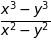

In [461]:
a=(x**3-y**3)/(x**2-y**2) #SymPy no cancela automaticamente terminos de fracciones
a

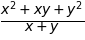

In [462]:
cancel(a) # Funcion para cancelar terminos arriba y abajo en una fraccion

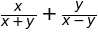

In [463]:
a=y/(x-y)+x/(x+y)
a

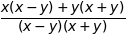

In [464]:
together(a) # Funcion para agrupar fracciones con el minimo comun denominador

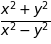

In [465]:
simplify(a) # funcion que intenta simplificar la expresion de entrada (dependiendo del problema no funciona muy bien)
# Toda la documentacion en :
# http://docs.sympy.org/latest/tutorial/simplification.html

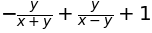

In [466]:
apart(a,x) # Descomposicion parcial de la fraccion con respecto a x

In [467]:
apart(a,y) # Descomposicion parcial de la fraccion con respecto a y

In [468]:
a=a.subs({x:1,y:2}) #Sustituimos en la expresion x = 1 e y =2
a 

In [469]:
a.n() # Evaluacion numerica como un numero flotante. Tambien se puede usar como veremos mas adelante evalf()

#### Funciones elementales

In [470]:
sin(-x)

In [471]:
cos(pi/4),tan(5*pi/6)

In [472]:
pi.n(100) #Evaluo el numero pi con una precision de 100 cifras

In [473]:
log(1),log(E) # El numero e en SymPy es E

In [474]:
exp(log(x)),log(exp(x)) #Logaritmos

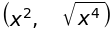

In [475]:
sqrt(x)**4,sqrt(x**4) # Raices

In [476]:
#Tened en cuenta que SymPy no simplifica, de ahí que las expresiones de la derecha sean distintas

In [477]:
p,q=symbols('p q',positive=True) # Si no defines el true, SymPy no simplifica la raiz
sqrt(p**2)

In [478]:
n=Symbol('n',integer=True) # I es la unidad imaginaria
exp(2*pi*I*n)

In [479]:
cos(x).rewrite(exp),exp(I*x).rewrite(cos) # El metodo rewrite intenta reescribir la expresion en terminos de una dada
# Primero el coseno en funcion de exp, y luego la exp en funcion del coseno

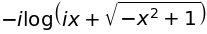

In [480]:
asin(x).rewrite(log)

In [481]:
trigsimp(2*sin(x)**2+3*cos(x)**2) #trigsimp intenta reescribir una expresion trigonometrica de la forma mas simple


In [482]:
expand_trig(sin(x-y)),expand_trig(sin(2*x)) # Expande senos y cosenos de sumas y angulos multiples

In [483]:
# Si queremos realizar la operacion inversa, reescribir productos y exponenciales de senos y cosenos
# en expresiones lineales, por ejemplo, una serie de Fourier

In [484]:
a1,a2,b1,b2=symbols('a1 a2 b1 b2')
a=a1*cos(x)+a2*cos(2*x)+b1*sin(x)+b2*sin(2*x)
a

In [485]:
a=(a**2).rewrite(exp).expand().rewrite(cos).expand()
# Queremos elevarla al cuadrado y luego agrupar los terminos
a

In [486]:
a.collect([cos(x),cos(2*x),cos(3*x),sin(x),sin(2*x),sin(3*x)]) # Funciona de la misma manera de con los polinomios

In [487]:
a=expand_log(log(p*q**2)) #Transforma logaritmos de productos y exponeciales en suma de logaritmos.
# logcombine realiza la operacion inversa
a

In [488]:
logcombine(a)

In [489]:
expand_power_exp(x**(p+q)) # Reescribe exponenciales cuyos exponentes son sumas, como productos de exponenciales

In [490]:
expand_power_base((x*y)**n) # Lo mismo con las bases

In [491]:
powsimp(exp(x)*exp(2*y)),powsimp(x**n*y**n) # La operacion inversa a las anteriores
# simplificacion/agrupacion de exponenciales

In [492]:
f=Function('f') # Tambien se pueden definir funciones con argumentos
f(x)+f(x,y)

#### Estructura de las expresiones

In [493]:
srepr(x+1) # srepr nos devuelve una estructura de arbol en formato string donde estan definidas nuestras variables

"Add(Symbol('x'), Integer(1))"

In [494]:
srepr(x-1)

"Add(Symbol('x'), Integer(-1))"

In [495]:
srepr(2*x*y/3)

"Mul(Rational(2, 3), Symbol('x'), Symbol('y'))"

In [496]:
srepr(x/y)

"Mul(Symbol('x'), Pow(Symbol('y'), Integer(-1)))"

In [497]:
#En vez de usar los operadores habituales +-*, tambien se pueden usar las funciones Add, Mul, Pow

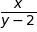

In [498]:
Mul(x,Pow(y-2,-1))

In [499]:
f=Function('f')
srepr(f(x,y))

"Function('f')(Symbol('x'), Symbol('y'))"

In [500]:
a=2*x*y**2
a.func


sympy.core.mul.Mul

In [501]:
a.args

In [502]:
a.subs(y,2) #Sustituimos y = 2

In [503]:
a.subs([(x,pi),(y,2)]) # Se pueden sustituir varios simbolos a la vez. Como una lista

In [504]:
a.subs({x:pi,y:2}) # Como una tupla

In [505]:
a=f(x)+f(y) # Tambien se puede sustituir el argumento de una funcion
a.subs(f(y),1)

In [506]:
(2*x*y*z).subs(x*y,z)

In [507]:
(x+x**2+x**3+x**4).subs(x**2,y)

In [508]:
a=x**2+y**3 #Sustitucion secuencial, primero x por y, luego y por x
a.subs([(x,y),(y,x)])

In [509]:
a.subs([(y,x),(x,y)]) # Misma sustitucion, cambiando el orden

In [510]:
a.subs([(x,y),(y,x)],simultaneous=True) # De manera simultanea

In [511]:
g=Function('g') # Tambien se pueden sustituir funciones
a=f(x)+f(y)
a.subs(f,g)

#### Resolucion de ecuaciones

In [512]:
a,b,c,d,e,f=symbols('a b c d e f')

In [513]:
Eq(a*x,b)

In [514]:
solve(Eq(a*x,b),x)

In [515]:
solve(a*x+b,x)

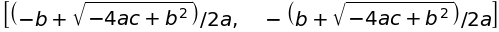

In [516]:
solve(a*x**2+b*x+c,x)

In [517]:
[a*x+b*y-e,c*x+d*y-f]

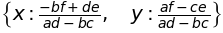

In [518]:
solve([a*x+b*y-e,c*x+d*y-f],[x,y]) # Sistema de ecuaciones lineales

In [519]:
roots(x**3-3*x+2,x) #Obtengo las raices de la expresion

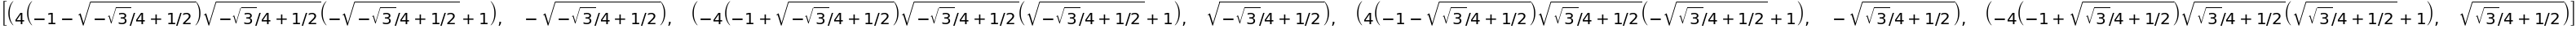

In [520]:
p1=x**2+y**2-1
p2=4*x*y-1
solve_poly_system([p1,p2],x,y) #Resuelve un sistema de ecuaciones polinomicas construyendo sus bases de Gröbner

#### Series

In [521]:
exp(x).series(x,0,5) # En torno a cero, hasta el orden 5

In [522]:
cot(x).series(x,n=5)

In [523]:
sqrt(x*(1-x)).series(x,n=5)

In [524]:
log(gamma(1+x)).series(x,n=6).rewrite(zeta)

In [525]:
#Vamos a preparar 3 series

In [526]:
sinx=series(sin(x),x,0,8)
sinx

In [527]:
cosx=series(cos(x),x,n=8)
cosx

In [528]:
tanx=series(tan(x),x,n=8)
tanx

In [529]:
series(tanx*cosx,n=8) # La serie de la tangente por el coseno es la del seno

In [530]:
series(sinx/cosx,n=8)

In [531]:
# series(sinx**2+cosx**2,n=9) Error

In [532]:
series(sinx**2+cosx**2,n=8) # Solo tenemos de precision hasta el orden 8

In [533]:
# Las series se pueden derivar e integrar

In [534]:
diff(sinx,x)

In [535]:
integrate(cosx,x)

In [536]:
# No se pueden sustituir valores numericos en una serie. Para ello hay que eliminar
# el ultimo orden de la serie, para convertirla en un polinomio

In [537]:
sinx.removeO()

#### Derivadas

In [538]:
a=x*sin(x+y)
diff(a,x)

In [539]:
diff(a,y)

In [540]:
diff(a,x,2,y) # La segunda derivada de x y la primera de y

In [541]:
a=x*f(x**2) # Se pueden derivar funciones de manera implicita
b=diff(a,x)
b

   2 ⎛ d        ⎞│         ⎛ 2⎞
2⋅x ⋅⎜───(f(ξ₁))⎟│    2 + f⎝x ⎠
     ⎝dξ₁       ⎠│ξ₁=x         

In [542]:
# Para evaluar las derivadas de manera explicita, utilizamos la funcion doit

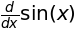

In [543]:
a=Derivative(sin(x),x)
a

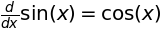

In [544]:
Eq(a,a.doit())

#### Integrales

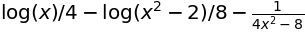

In [545]:
integrate(1/(x*(x**2-2)**2),x) #Tenemos que definir sobre que variable integramos

In [546]:
integrate(1/(exp(x)+1),x)

In [547]:
integrate(log(x),x)

In [548]:
integrate(x*sin(x),x)

In [549]:
integrate(x*exp(-x**2),x)

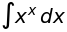

In [550]:
a=integrate(x**x,x)
a

In [551]:
print(a)

Integral(x**x, x)


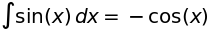

In [552]:
a=Integral(sin(x),x)
Eq(a,a.doit())

In [553]:
integrate(sin(x),(x,0,pi))

In [554]:
integrate(exp(-x**2),(x,0,oo))

#### Suma de series

In [555]:
summation(1/n**2,(n,1,oo)) # oo significa infinito

In [556]:
summation((-1)**n/n**2,(n,1,oo))

In [557]:
summation(1/n**4,(n,1,oo))

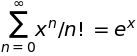

In [558]:
a=Sum(x**n/factorial(n),(n,0,oo))
Eq(a,a.doit())

#### Limites

In [559]:
limit((tan(sin(x))-sin(tan(x)))/x**7,x,0)

In [560]:
limit((tan(sin(x))-sin(tan(x)))/(x**7+exp(-1/x)),x,0)

In [561]:
limit((tan(sin(x))-sin(tan(x)))/(x**7+exp(-1/x)),x,0)

#### Ecuaciones diferenciales

In [562]:
t=Symbol('t')
x=Function('x')
p=Function('p')

In [563]:
dsolve(diff(x(t),t)+x(t),x(t))

In [564]:
dsolve(diff(x(t),t,2)+x(t),x(t))

In [565]:
dsolve((diff(x(t),t)-p(t),diff(p(t),t)+x(t)))

#### Algebra lineal

In [566]:
a,b,c,d,e,f=symbols('a b c d e f')

M=Matrix([[a,b,c],[d,e,f]])
M

⎡a  b  c⎤
⎢       ⎥
⎣d  e  f⎦

In [567]:
M.shape #Nos devuelve la forma de la matriz en formato (fila, columna)

In [568]:
Matrix([[1,2,3]])

[1  2  3]

In [569]:
def g(i,j):
    return Rational(1,i+j+1)
Matrix(3,3,g)

# Podemos definir una matriz como una funcion

⎡ 1   1/2  1/3⎤
⎢             ⎥
⎢1/2  1/3  1/4⎥
⎢             ⎥
⎣1/3  1/4  1/5⎦

In [570]:
g=Function('g')
M=Matrix(3,3,g)
M

⎡g(0, 0)  g(0, 1)  g(0, 2)⎤
⎢                         ⎥
⎢g(1, 0)  g(1, 1)  g(1, 2)⎥
⎢                         ⎥
⎣g(2, 0)  g(2, 1)  g(2, 2)⎦

In [571]:
M[1,2] = Rational(1/2)
M

⎡g(0, 0)  g(0, 1)  g(0, 2)⎤
⎢                         ⎥
⎢g(1, 0)  g(1, 1)    1/2  ⎥
⎢                         ⎥
⎣g(2, 0)  g(2, 1)  g(2, 2)⎦

In [572]:
M[1,:]

[g(1, 0)  g(1, 1)  1/2]

In [573]:
M[0:2,1:3]

⎡g(0, 1)  g(0, 2)⎤
⎢                ⎥
⎣g(1, 1)    1/2  ⎦

In [574]:
eye(3) #Matriz identidad

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [575]:
zeros(3) #Matriz de ceros

⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦

In [576]:
diag(1,2,3) #Matriz diagonal

⎡1  0  0⎤
⎢       ⎥
⎢0  2  0⎥
⎢       ⎥
⎣0  0  3⎦

In [577]:
M=Matrix([[a,1],[0,a]])
diag(1,M,2)

⎡1  0  0  0⎤
⎢          ⎥
⎢0  a  1  0⎥
⎢          ⎥
⎢0  0  a  0⎥
⎢          ⎥
⎣0  0  0  2⎦

In [578]:
A=Matrix([[a,b],[c,d]])
B=Matrix([[1,2],[3,4]])
A+B

⎡a + 1  b + 2⎤
⎢            ⎥
⎣c + 3  d + 4⎦

In [579]:
simplify(A**(-1))

⎡    d         -b    ⎤
⎢─────────  ─────────⎥
⎢a⋅d - b⋅c  a⋅d - b⋅c⎥
⎢                    ⎥
⎢   -c          a    ⎥
⎢─────────  ─────────⎥
⎣a⋅d - b⋅c  a⋅d - b⋅c⎦

In [580]:
det(A) #Determinante de la matriz

#### Autovalores y autovectores

In [581]:
x=Symbol('x',real=True)

In [582]:
M=Matrix([[(1-x)**3*(3+x),4*x*(1-x**2),-2*(1-x**2)*(3-x)],
          [4*x*(1-x**2),-(1+x)**3*(3-x),2*(1-x**2)*(3+x)],
          [-2*(1-x**2)*(3-x),2*(1-x**2)*(3+x),16*x]])
M

⎡         3                  ⎛   2    ⎞              ⎛   2    ⎞ ⎤
⎢ (-x + 1) ⋅(x + 3)      4⋅x⋅⎝- x  + 1⎠     (-x + 3)⋅⎝2⋅x  - 2⎠ ⎥
⎢                                                               ⎥
⎢      ⎛   2    ⎞                       3           ⎛     2    ⎞⎥
⎢  4⋅x⋅⎝- x  + 1⎠      -(-x + 3)⋅(x + 1)    (x + 3)⋅⎝- 2⋅x  + 2⎠⎥
⎢                                                               ⎥
⎢         ⎛   2    ⎞          ⎛     2    ⎞                      ⎥
⎣(-x + 3)⋅⎝2⋅x  - 2⎠  (x + 3)⋅⎝- 2⋅x  + 2⎠          16⋅x        ⎦

In [583]:
det(M)
# Esto significa que la matriz es una aplicacion de un subespacio el que sea a cero


In [584]:
#Hallamos la base del subespacio

v=M.nullspace()
len(v)
#En este caso es unidimensional

In [585]:
v=simplify(v[0])
v

⎡ -2  ⎤
⎢─────⎥
⎢x - 1⎥
⎢     ⎥
⎢  2  ⎥
⎢─────⎥
⎢x + 1⎥
⎢     ⎥
⎣  1  ⎦

In [586]:
simplify(M*v)

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

In [587]:
M.eigenvals()
# Los autovalores y sus multiplicidades

In [588]:
v=M.eigenvects()
len(v)

In [589]:
for i in range(len(v)):
    v[i][2][0]=simplify(v[i][2][0])
v
# Los autovectores

⎡⎛      ⎡⎡ -2  ⎤⎤⎞  ⎛               ⎡⎡x   1⎤⎤⎞  ⎛              ⎡⎡ x - 1 ⎤⎤⎞⎤
⎢⎜      ⎢⎢─────⎥⎥⎟  ⎜               ⎢⎢─ + ─⎥⎥⎟  ⎜              ⎢⎢ ───── ⎥⎥⎟⎥
⎢⎜      ⎢⎢x - 1⎥⎥⎟  ⎜         2     ⎢⎢2   2⎥⎥⎟  ⎜        2     ⎢⎢ x + 1 ⎥⎥⎟⎥
⎢⎜      ⎢⎢     ⎥⎥⎟  ⎜ ⎛ 2    ⎞      ⎢⎢     ⎥⎥⎟  ⎜⎛ 2    ⎞      ⎢⎢       ⎥⎥⎟⎥
⎢⎜0, 1, ⎢⎢  2  ⎥⎥⎟, ⎜-⎝x  + 3⎠ , 1, ⎢⎢x + 1⎥⎥⎟, ⎜⎝x  + 3⎠ , 1, ⎢⎢  x   1⎥⎥⎟⎥
⎢⎜      ⎢⎢─────⎥⎥⎟  ⎜               ⎢⎢─────⎥⎥⎟  ⎜              ⎢⎢- ─ + ─⎥⎥⎟⎥
⎢⎜      ⎢⎢x + 1⎥⎥⎟  ⎜               ⎢⎢x - 1⎥⎥⎟  ⎜              ⎢⎢  2   2⎥⎥⎟⎥
⎢⎜      ⎢⎢     ⎥⎥⎟  ⎜               ⎢⎢     ⎥⎥⎟  ⎜              ⎢⎢       ⎥⎥⎟⎥
⎣⎝      ⎣⎣  1  ⎦⎦⎠  ⎝               ⎣⎣  1  ⎦⎦⎠  ⎝              ⎣⎣   1   ⎦⎦⎠⎦

In [590]:
for i in range(len(v)):
    z=M*v[i][2][0]-v[i][0]*v[i][2][0]
    pprint(simplify(z))

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦
⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦
⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦


In [591]:
M=Matrix([[Rational(13,9),-Rational(2,9),Rational(1,3),Rational(4,9),Rational(2,3)],
          [-Rational(2,9),Rational(10,9),Rational(2,15),-Rational(2,9),-Rational(11,15)],
          [Rational(1,5),-Rational(2,5),Rational(41,25),-Rational(2,5),Rational(12,25)],
          [Rational(4,9),-Rational(2,9),Rational(14,15),Rational(13,9),-Rational(2,15)],
          [-Rational(4,15),Rational(8,15),Rational(12,25),Rational(8,15),Rational(34,25)]])
M

⎡13/9   -2/9  1/3   4/9    2/3 ⎤
⎢                              ⎥
⎢                         -11  ⎥
⎢-2/9   10/9  2/15  -2/9  ──── ⎥
⎢                          15  ⎥
⎢                              ⎥
⎢              41          12  ⎥
⎢ 1/5   -2/5   ──   -2/5   ──  ⎥
⎢              25          25  ⎥
⎢                              ⎥
⎢              14              ⎥
⎢ 4/9   -2/9   ──   13/9  -2/15⎥
⎢              15              ⎥
⎢                              ⎥
⎢              12          34  ⎥
⎢-4/15  8/15   ──   8/15   ──  ⎥
⎣              25          25  ⎦

In [592]:
P,J=M.jordan_form()
J
# Funcion para obtener la diagonal 

⎡1  0  0    0      0  ⎤
⎢                     ⎥
⎢0  2  1    0      0  ⎥
⎢                     ⎥
⎢0  0  2    0      0  ⎥
⎢                     ⎥
⎢0  0  0  1 - ⅈ    0  ⎥
⎢                     ⎥
⎣0  0  0    0    1 + ⅈ⎦

In [593]:
P=simplify(P)
P

⎡                5⋅ⅈ   -5⋅ⅈ ⎤
⎢-2  10/9   0    ───   ─────⎥
⎢                 12     12 ⎥
⎢                           ⎥
⎢               -5⋅ⅈ    5⋅ⅈ ⎥
⎢-2  -5/9   0   ─────   ─── ⎥
⎢                 6      6  ⎥
⎢                           ⎥
⎢0    0    4/3  -3/4   -3/4 ⎥
⎢                           ⎥
⎢               -5⋅ⅈ    5⋅ⅈ ⎥
⎢1   10/9   0   ─────   ─── ⎥
⎢                 6      6  ⎥
⎢                           ⎥
⎣0    0     1     1      1  ⎦

In [594]:
Z=P*J*P**(-1)-M
simplify(Z)

⎡0  0  0  0  0⎤
⎢             ⎥
⎢0  0  0  0  0⎥
⎢             ⎥
⎢0  0  0  0  0⎥
⎢             ⎥
⎢0  0  0  0  0⎥
⎢             ⎥
⎣0  0  0  0  0⎦

# Plots
SymPy uses matplotlib.

In [595]:
%matplotlib inline

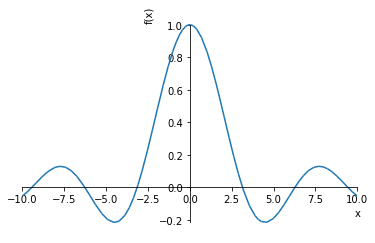

In [606]:
#A single function
plot(sin(x)/x,(x,-10,10))

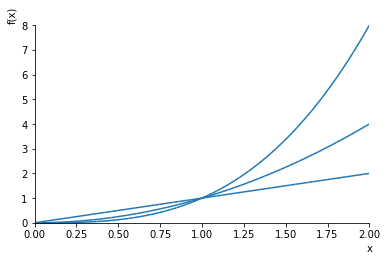

In [597]:
#Several functions.

plot(x,x**2,x**3,(x,0,2))

In [598]:
#Some additional plotting functions can be imported from sympy.plotting.

from sympy.plotting import (plot_parametric,plot_implicit,
                            plot3d,plot3d_parametric_line,
                            plot3d_parametric_surface)

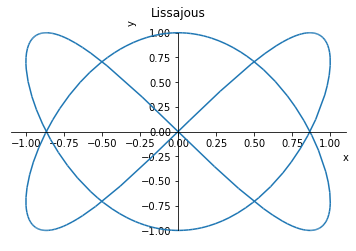

In [599]:
#A parametric plot - a Lissajous curve.

t=Symbol('t')
plot_parametric(sin(2*t),cos(3*t),(t,0,2*pi),title='Lissajous',xlabel='x',ylabel='y')

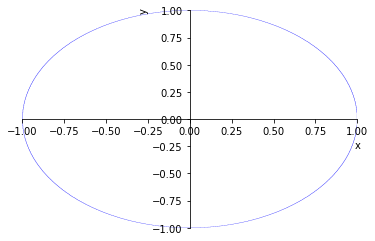

In [600]:
#An implicit plot - a circle.

plot_implicit(x**2+y**2-1,(x,-1,1),(y,-1,1))

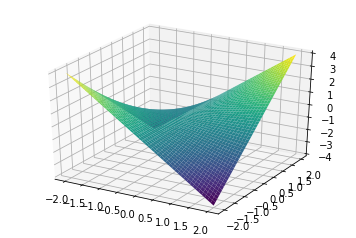

In [601]:
#A surface. If it is not inline but in a separaye window, you can rotate it with your mouse.

plot3d(x*y,(x,-2,2),(y,-2,2))

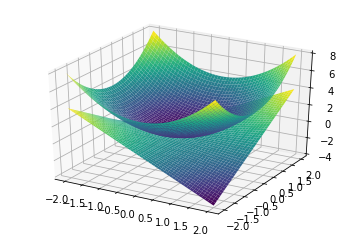

In [602]:
#Several surfaces.

plot3d(x**2+y**2,x*y,(x,-2,2),(y,-2,2))

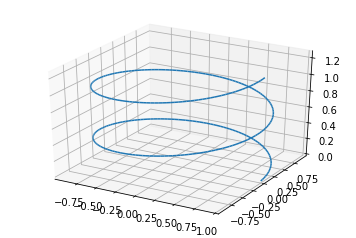

In [603]:
#A parametric space curve - a spiral.

a=0.1
plot3d_parametric_line(cos(t),sin(t),a*t,(t,0,4*pi))

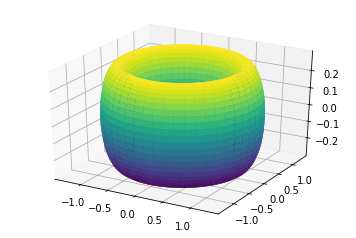

In [604]:
#A parametric surface - a torus.

u,v=symbols('u v')
a=0.3
plot3d_parametric_surface((1+a*cos(u))*cos(v),
                          (1+a*cos(u))*sin(v),a*sin(u),
                          (u,0,2*pi),(v,0,2*pi))